# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Manokhina Anastasia*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

**1. Generate networks according to the models above (N>1000 nodes)**

In [2]:
import networkx as nx
import random

#set the parameters of network
n = 1500
m = 10

#model A
def growing_network(n, m):
    if m < 1 or  m >= n:
        return None
    else:
        G = nx.empty_graph(m)
        for i in range(0, n - m):
            rand_nodes = random.sample(G.nodes(), m)
            G.add_node(m + i)
            edges = zip([m + i]*m, rand_nodes)
            G.add_edges_from(edges)
        return G

In [3]:
gn = growing_network(n, m)

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def _random_subset(seq,m):
    """ Return m unique elements from seq.

    This differs from random.sample which can return repeated
    elements if seq holds repeated elements.
    """
    targets=set()
    while len(targets)<m:
        x=random.choice(seq)
        targets.add(x)
    return targets

In [6]:
#model B
def pref_attach(n, m):
    G = nx.empty_graph(n)
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=0
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source]*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

In [7]:
pa = pref_attach(n,m)

**2. Compute CDF/PDF, describe the distribution and compute\describe its properties.**

In [8]:
#sorted degrees of model A
node_degrees = np.array(sorted(nx.degree(gn).values(),reverse=False))

#counting unique degrees
gn_deg = pd.DataFrame(np.vstack(np.unique(node_degrees, return_counts=True)).T, columns=['deg', 'ncount'])
gn_idx = pd.DataFrame(np.arange(node_degrees.max())+1, columns=['deg'])

gn_data = pd.merge(gn_idx, gn_deg, 'outer', on='deg').fillna(0)
gn_data['cumsum'] = np.cumsum(gn_data['ncount'])
gn_data['CDF'] = gn_data['cumsum']/node_degrees.shape[0]
gn_data.tail(10)

,deg,ncount,cumsum,CDF
60,61,0,1497,0.998000
61,62,0,1497,0.998000
62,63,0,1497,0.998000
63,64,1,1498,0.998667
64,65,0,1498,0.998667
65,66,0,1498,0.998667
66,67,0,1498,0.998667
67,68,1,1499,0.999333
68,69,0,1499,0.999333
69,70,1,1500,1.000000


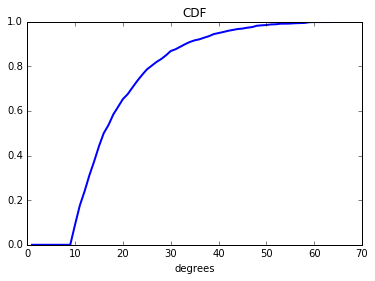

In [9]:
#plotting СDF
plt.plot(gn_data['deg'], gn_data['CDF'], 'b-', linewidth = 2)
plt.title('CDF')
plt.xlabel('degrees')

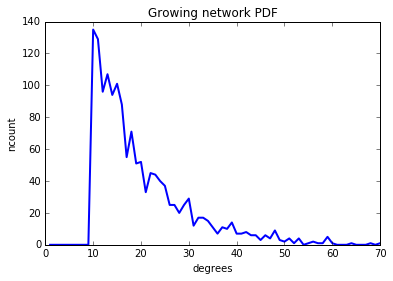

In [10]:
#pdf model A
plt.plot(gn_data['deg'], gn_data['ncount'], 'b-', linewidth = 2)
plt.title('Growing network PDF')
plt.xlabel('degrees')
plt.ylabel('ncount')

In [11]:
#gn_data['ncount'].replace(0, 0.000000001,inplace=True)
gn_data['log_freq'] = np.log10(gn_data['ncount'])
gn_data['log_idx'] = np.log10(gn_data.index+1)

Some of values in table are nor defined (-inf) as we don't have the nodes with degree below zero (ncount = 0, log value undefined).

In [12]:
gn_data.head(15)

,deg,ncount,cumsum,CDF,log_freq,log_idx
0,1,0,0,0.000000,-inf,0.000000
1,2,0,0,0.000000,-inf,0.301030
2,3,0,0,0.000000,-inf,0.477121
3,4,0,0,0.000000,-inf,0.602060
4,5,0,0,0.000000,-inf,0.698970
5,6,0,0,0.000000,-inf,0.778151
6,7,0,0,0.000000,-inf,0.845098
7,8,0,0,0.000000,-inf,0.903090
8,9,0,0,0.000000,-inf,0.954243
9,10,135,135,0.090000,2.130334,1.000000


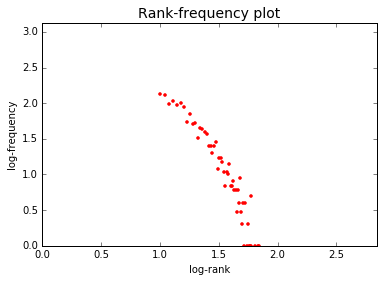

In [13]:
plt.plot(gn_data['log_idx'], gn_data['log_freq'], 'r.')
plt.axis([0, gn_data['log_idx'].max()+1, 0, gn_data['log_freq'].max()+1])
plt.title('Rank-frequency plot', fontsize=14)
plt.xlabel('log-rank')
plt.ylabel('log-frequency')
plt.show()

Log-log plot doesn't look linear, thus we can't assume the power law here.

In [14]:
#sorted degrees, model B
node_degrees = np.array(sorted(nx.degree(pa).values(),reverse=False))

#conting unique degrees
pa_deg = pd.DataFrame(np.vstack(np.unique(node_degrees, return_counts=True)).T, columns=['deg', 'ncount'])
pa_idx = pd.DataFrame(np.arange(node_degrees.max())+1, columns=['deg'])

pa_data = pd.merge(pa_idx, pa_deg, 'outer', on='deg').fillna(0)
pa_data['cumsum'] = np.cumsum(pa_data['ncount'])
pa_data['CDF'] = pa_data['cumsum']/node_degrees.shape[0]

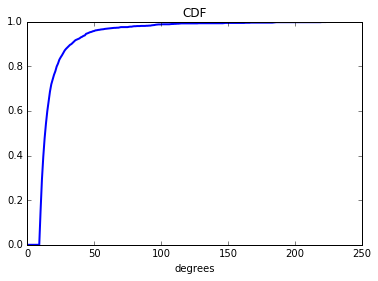

In [15]:
#plotting СDF
plt.plot(pa_data['deg'], pa_data['CDF'], 'b-', linewidth = 2)
plt.title('CDF')
plt.xlabel('degrees')

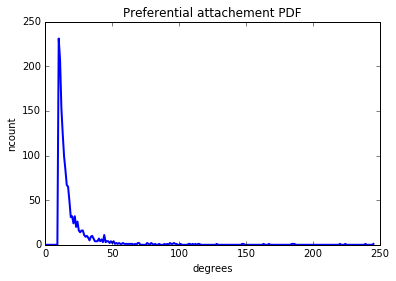

In [16]:
#pdf model B
plt.plot(pa_data['deg'], pa_data['ncount'], 'b-', linewidth = 2)
plt.title('Preferential attachement PDF')
plt.xlabel('degrees')
plt.ylabel('ncount')

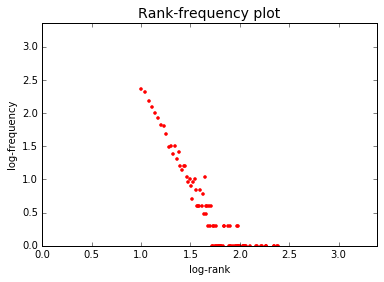

In [17]:
pa_data['log_freq'] = np.log10(pa_data['ncount'])
pa_data['log_idx'] = np.log10(pa_data.index+1)

plt.plot(pa_data['log_idx'], pa_data['log_freq'], 'r.')
plt.axis([0, pa_data['log_idx'].max()+1, 0, pa_data['log_freq'].max()+1])
plt.title('Rank-frequency plot', fontsize=14)
plt.xlabel('log-rank')
plt.ylabel('log-frequency')
plt.show()

In this case log-log plot doesn't look linear for all the nodes, so we can't assume the power law here too.

**3. Illustate the following dependencies:**


In [18]:
#average path length to the number of nodes
#average clustering coefficient to the number of nodes
#average node degree to the node's "age"

n_nodes = list(range(m, n + 1, 50)) 
ages = list(reversed(range(m, n - m + 2,50)))

I've tried to write the functions collecting wanted parameters at each time step (for every kind of graph, A and B), but it seems working very very slow, even impossible to wait for the result.

In [19]:
def params_a(n, m):
    avg_path_length = []
    avg_clust_coef = []
    avg_node_degree = []
    
    G = nx.empty_graph(m)
    for i in range(0, n - m):
        rand_nodes = random.sample(G.nodes(), m)
        G.add_node(m + i)
        edges = zip([m + i]*m, rand_nodes)
        G.add_edges_from(edges)
        avg_path_length.append(nx.average_shortest_path_length(G))
        avg_clust_coef.append(nx.average_clustering(G))
        avg_node_degree.append(sum(list(G.degree(G.nodes()).values()))/len(list(G.degree(G.nodes()).values())))
        
    return {"avg_path_length:": avg_path_length, "avg_clust_coef": avg_clust_coef, "avg_node_degree": avg_node_degree}

In [20]:
def params_b(n, m):
    avg_path_length = []
    avg_clust_coef = []
    avg_node_degree = []
        
    G=nx.empty_graph(n)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=0
    
    while source<=n:
            # Add edges to m nodes from the source.
        G.add_edges_from(zip([source]*m,targets))
            # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
            # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([source]*m)
            # Now choose m unique nodes from the existing nodes
            # Pick uniformly from repeated_nodes (preferential attachement)
        targets = _random_subset(repeated_nodes,m)
        source += 1
            
        avg_path_length.append(nx.average_shortest_path_length(G))
        avg_clust_coef.append(nx.average_clustering(G))
        avg_node_degree.append(sum(list(G.degree(G.nodes()).values()))/len(list(G.degree(G.nodes()).values())))
            
    return {"avg_path_length": avg_path_length, "avg_clust_coef": avg_clust_coef, "avg_node_degree": avg_node_degree}

So I decided to count the parameters after every 50 time steps just in loop. It worked much faster:

In [21]:
#for model A
avg_path_length_a = []
avg_clust_coef_a = []
avg_node_degree_a = []


G = nx.empty_graph(m)
for j in range(0, n, 50):
    rand_nodes = random.sample(G.nodes(), m)
    G.add_node(m + j)
    edges = zip([m + j]*m, rand_nodes)
    G.add_edges_from(edges)
    avg_path_length_a.append(nx.average_shortest_path_length(G))
    avg_clust_coef_a.append(nx.average_clustering(G))
    avg_node_degree_a.append(sum(list(G.degree(G.nodes()).values()))/len(list(G.degree(G.nodes()).values())))

In [ ]:
#for model B

avg_path_length_b = []
avg_clust_coef_b = []
avg_node_degree_b = []

G=nx.empty_graph(n)
for j in range(0, n):   
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.

    # Add edges to m nodes from the source.
    G.add_edges_from(zip([j]*m,targets))
    # Add one node to the list for each new edge just created.
    repeated_nodes.extend(targets)
    # And the new node "source" has m edges to add to the list.
    repeated_nodes.extend([j]*m)
    # Now choose m unique nodes from the existing nodes
    # Pick uniformly from repeated_nodes (preferential attachement)
    targets = _random_subset(repeated_nodes,m)

    if j%50 == 0 and j!=0:
        avg_path_length_b.append(nx.average_shortest_path_length(G))        
    else:
        continue
        #avg_path_length_b.append(n*2) # assume a number which is greater than number of nodes aka "infinity"
    avg_clust_coef_b.append(nx.average_clustering(G))
    avg_node_degree_b.append(sum(list(G.degree(G.nodes()).values()))/len(list(G.degree(G.nodes()).values())))
            

In [62]:
avg_path_length_b = []
avg_clust_coef_b = []
avg_node_degree_b = []


G = nx.empty_graph(n)
for j in range(n):
    targets=list(range(m))
        # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
        # Start adding the other n-m nodes. The first node is m.
        # Add edges to m nodes from the source.
    G.add_edges_from(zip([j]*m,targets))
        # Add one node to the list for each new edge just created.
    repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
    repeated_nodes.extend([j]*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
    targets = _random_subset(repeated_nodes,m)
    j += 1
    if not nx.is_connected(G):
        if j % 50 == 0:    
            avg_path_length_b.append(0)
            avg_clust_coef_b.append(nx.average_clustering(G))
            avg_node_degree_b.append(0)
    else:    
        if j % 50 == 0:
            avg_path_length_b.append(nx.average_shortest_path_length(G))
            avg_clust_coef_b.append(nx.average_clustering(G))
            avg_node_degree_b.append(sum(list(G.degree(G.nodes()).values()))/len(list(G.degree(G.nodes()).values())))


In [69]:
#let's see the result of counting the parameters of model B
print('path lengths',avg_path_length_b)
print('clustering',avg_clust_coef_b)
print('avg node degree',avg_node_degree_b)

('path lengths', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.986706693351123])
('clustering', [0.02891156462585034, 0.06116264687693259, 0.09411693572767399, 0.12725749961930866, 0.16047415468324913, 0.1937292840415105, 0.22700655402957545, 0.26029772924774247, 0.2935982076572277, 0.32690521605459916, 0.3602169837661042, 0.3935323271971309, 0.42685042515550986, 0.4601706900156179, 0.4934926901941745, 0.5268161015806099, 0.5601406760450697, 0.5934662204065724, 0.6267925820206035, 0.6601196386767528, 0.6934472913740701, 0.7267754590611435, 0.7601040747445892, 0.7934330825678791, 0.8267624355894972, 0.8600920940726007, 0.8934220241538774, 0.9267521967970173, 0.960082586962241, 0.9934131729415813])
('avg node degree', [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19])


**The problem is that in model B we have to wait till the end of time period to make graph connected, as first approximation assumes n isolated nodes, which is very hard to connect my m edges at every time step. That's why I set up non-defined values (path lengths and average node degree) to zero.**

Plotting parameter values in time:
#1. average path length to the number of nodes

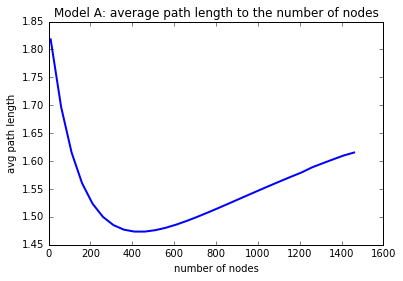

In [36]:
#avg_path_length
plt.plot(n_nodes, avg_path_length_a, 'b-', linewidth = 2)
plt.title('Model A: average path length to the number of nodes')
plt.xlabel('number of nodes')
plt.ylabel('avg path length')

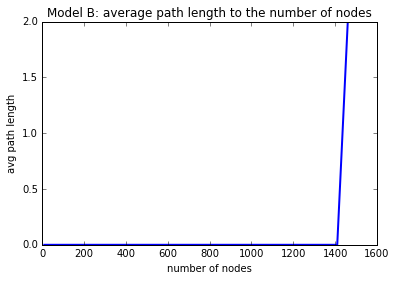

In [64]:
plt.plot(n_nodes, avg_path_length_b, 'b-', linewidth = 2)
plt.title('Model B: average path length to the number of nodes')
plt.xlabel('number of nodes')
plt.ylabel('avg path length')

#2. average clustering coefficient to the number of nodes

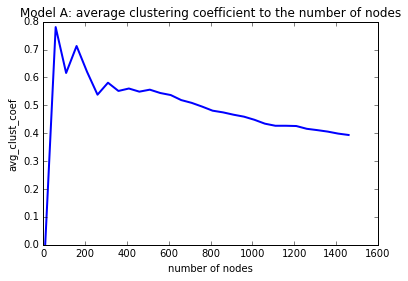

In [53]:
plt.plot(n_nodes, avg_clust_coef_a, 'b-', linewidth = 2)
plt.title('Model A: average clustering coefficient to the number of nodes')
plt.xlabel('number of nodes')
plt.ylabel("avg_clust_coef")

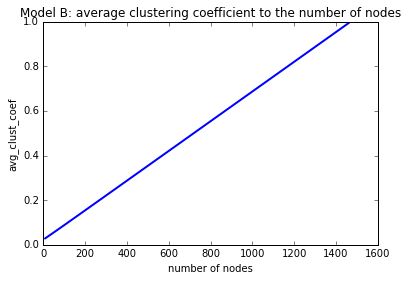

In [65]:
plt.plot(n_nodes, avg_clust_coef_b, 'b-', linewidth = 2)
plt.title('Model B: average clustering coefficient to the number of nodes')
plt.xlabel('number of nodes')
plt.ylabel("avg_clust_coef")

#3. average node degree to the node's "age"

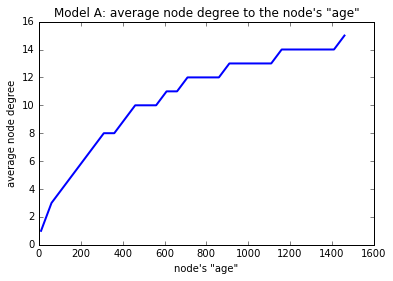

In [127]:
plt.plot(n_nodes, avg_node_degree_a, 'b-', linewidth = 2)
plt.title('Model A: average node degree to the node\'s "age"')
plt.xlabel('node\'s "age"')
plt.ylabel('average node degree')

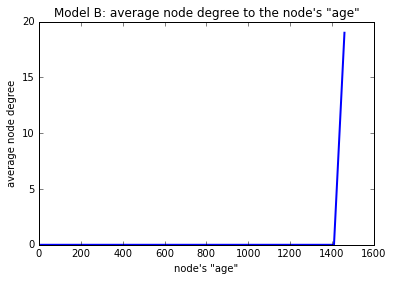

In [67]:
plt.plot(n_nodes, avg_node_degree_b, 'b-', linewidth = 2)
plt.title('Model B: average node degree to the node\'s "age"')
plt.xlabel('node\'s "age"')
plt.ylabel('average node degree')
 

**4. Is scale-free property conserved in these models?**

A scale-free network is a network whose degree distribution follows a power law, at least asymptotically. Barabási–Albert model is actually the first scale-free model, but as we see, both factors -- growing and preferential attachement idea -- are sufficient here, as without any of them network stops being scale-free.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

**1. Generate graph based on the model (N>1000 nodes)**

In [164]:
n = 1500

def vertex_copy_netw(n, q):
    if q > 1:
        return None
    else:
        nds = 100
        G = nx.gnp_random_graph(nds, 0.5)      
        count = 0
        while count<n:          
            r_vertex = random.choice(G.nodes())
            G.add_node(nds+count)   
            for neighbor in G.neighbors(r_vertex):
                prob = random.uniform(0, 1) 
                if prob <= q:
                    G.add_edge(nds+count,neighbor)               
                else:
                    G.remove_edge(r_vertex, random.choice(G.neighbors(r_vertex)))  
                    G.add_edge(r_vertex, random.choice(G.nodes())) 
            count += 1
    return G

In [165]:
vcn = vertex_copy_netw(n, 0.5)

**2. СDF and PDF**

In [167]:
node_degrees = np.array(sorted(nx.degree(vcn).values(),reverse=False))

vcn_deg = pd.DataFrame(np.vstack(np.unique(node_degrees, return_counts=True)).T, columns=['deg', 'ncount'])
vcn_idx = pd.DataFrame(np.arange(node_degrees.max())+1, columns=['deg'])

vcn_data = pd.merge(vcn_idx, vcn_deg, 'outer', on='deg', sort=True).fillna(0)
vcn_data['cumsum'] = np.cumsum(vcn_data['ncount'])
vcn_data['CDF'] = vcn_data['cumsum']/node_degrees.shape[0]
vcn_data.tail(10)

,deg,ncount,cumsum,CDF
111,112,0,1595,0.996875
112,113,2,1597,0.998125
113,114,1,1598,0.998750
114,115,1,1599,0.999375
115,116,0,1599,0.999375
116,117,0,1599,0.999375
117,118,0,1599,0.999375
118,119,0,1599,0.999375
119,120,0,1599,0.999375
120,121,1,1600,1.000000


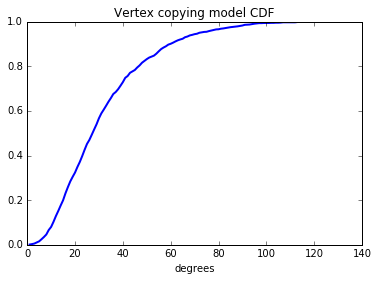

In [197]:
#plotting СDF
plt.plot(vcn_data['deg'], vcn_data['CDF'], 'b-', linewidth = 2)
plt.title('Vertex copying model CDF')
plt.xlabel('degrees')

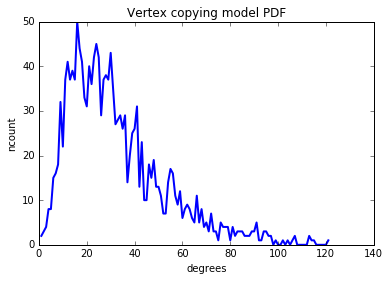

In [169]:
plt.plot(vcn_data['deg'], vcn_data['ncount'], 'b-', linewidth = 2)
plt.title('Vertex copying model PDF')
plt.xlabel('degrees')
plt.ylabel('ncount')

In [170]:
vcn_data['log_freq'] = np.log10(vcn_data['ncount'])
vcn_data['log_idx'] = np.log10(vcn_data.index+1)

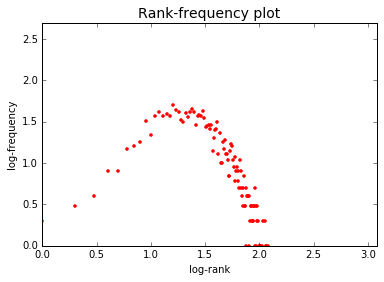

In [171]:
plt.plot(vcn_data['log_idx'], vcn_data['log_freq'], 'r.')
plt.axis([0, vcn_data['log_idx'].max()+1, 0, vcn_data['log_freq'].max()+1])
plt.title('Rank-frequency plot', fontsize=14)
plt.xlabel('log-rank')
plt.ylabel('log-frequency')
plt.show()

We see that this model is also not scale-free.

**3. Parameters:**

In [183]:
avg_path_length = []
avg_clust_coef = []
avg_node_degree = []
    
n_nodes = []
q=0.5
nds = 100
G = nx.gnp_random_graph(nds, 0.5)      
count = 0
while count<n:          
    r_vertex = random.choice(G.nodes())
    G.add_node(nds+count)   
    for neighbor in G.neighbors(r_vertex):
        prob = random.uniform(0, 1) 
        if prob <= q:
            G.add_edge(nds+count,neighbor)               
        else:
            G.remove_edge(r_vertex, random.choice(G.neighbors(r_vertex)))  
            G.add_edge(r_vertex, random.choice(G.nodes())) 

    if not nx.is_connected(G) and count %50 == 0:
        avg_path_length.append(0)           
        avg_node_degree.append(0)
        avg_clust_coef.append(nx.average_clustering(G))
        n_nodes.append(len(G.nodes()))
    elif count %50 == 0:
        avg_path_length.append(nx.average_shortest_path_length(G))           
        avg_node_degree.append(sum(list(G.degree(G.nodes()).values()))/len(list(G.degree(G.nodes()).values())))
        avg_clust_coef.append(nx.average_clustering(G))
        n_nodes.append(len(G.nodes()))
    count += 1
 

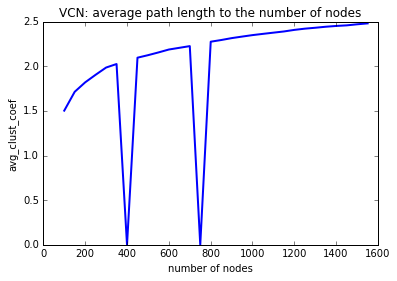

In [184]:
plt.plot(n_nodes, avg_path_length, 'b-', linewidth = 2)
plt.title('VCN: average path length to the number of nodes')
plt.xlabel('number of nodes')
plt.ylabel("avg_path_length")

By this plot we see that the graph happened to become not connected twice, but then the mechanism made it connected on next iteration.

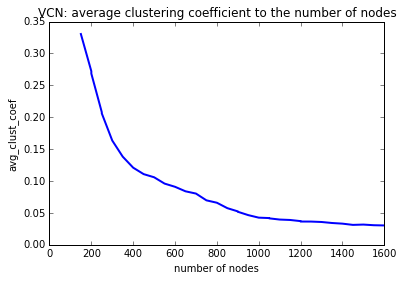

In [178]:
plt.plot(n_nodes, avg_clust_coef, 'b-', linewidth = 2)
plt.title('VCN: average clustering coefficient to the number of nodes')
plt.xlabel('number of nodes')
plt.ylabel("avg_clust_coef")

In [192]:
ages = list(reversed(range(100, 1600, 50)))

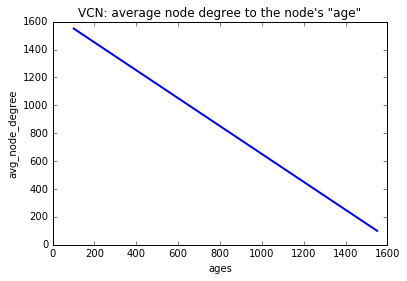

In [196]:
plt.plot(n_nodes, ages, 'b-', linewidth = 2)
plt.title('VCN: average node degree to the node\'s "age"')
plt.xlabel('ages')
plt.ylabel("avg_node_degree")

This model's behaviour is different from those from the first task. It's always (or almost always) returns connected graph, so we can count the change every parameter and